# Исследование исторических данных о продажах игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

#### Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

*Данные за 2016 год могут быть неполными.*


#### Часть 1. Подготовка
* [Изучение файлов, получение общей информации.](#part1)


#### Часть 2. Предобработка данных
* [1.Переименование столбцов, удаление лишних строк.](#part2.1)
* [2.Изменение типа данных, заполнение пропусков и обработка дубликатов.](#part2.2)

#### Часть 3. Исследовательский анализ данных
* [1. Количество игр, выпущенных в разные годы.](#part3.1)
* [2. Продажи игр, выпущенных в разные годы на разных платформах](#part3.2)
* [3. Данные за актуальный период. Платформы.](#part3.3)
* [4. Глобальные продажи игр в разбивке по платформам](#part3.4)
* [5. Корреляция между отзывами и продажами](#part3.5)
* [6. Распределение по жанрам.](#part3.6)

#### Часть 4. Портрет пользователя каждого региона.
* [1. Топ-5 популярных жанров и платформ для каждого региона](#part4.1) 
* [2. Зависимость продаж от рейтинга ESRB](#part4.2)

#### Часть 5. Проверка гипотез.
* [1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.](#part5.1)
* [2. Средние пользовательские рейтинги жанров Action и Sports разные.](#part5.2)

#### [Общий вывод](#part6)




## Часть 1. Подготовка.
<a id='part1'></a>
### Изучение файлов, получение общей информации.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/datasets/games.csv')
df.info()
display(df.head(15))
df['Rating'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

## Вывод
В столбце рейтинга присутствует значение K-A, которое в 1998 году было заменено на E. Можно объединить.
Также присутствует значение RP. Это означает, что рейтинг еще не выставлен.

Год выпуска игры можно заменить на тип int.

В столбце user_score присутствует значение tbd, что скорее всего означает, что пользовательская оценка еще не выставлена либо слишком мало человек выставило игре оценку. Можно заменить на NaN, т.к. смысл практически такой же.

Присутствуют пропуски в столбцах name, year_of_release, genre, critic_score, user_score, rating.

В столбцах critic_score и user_score количественные переменные. Пропуски скорее всего обусловлены тем, что оценку игре не выставили. Заполнить их можно средним значением оценки на основании платформы, года выпуска, жанра и количества продаж. Далее имеет смысл привести значения в столбцах к одному виду - 100-балльному.

В столбце rating категориальные переменные. Пропуски могут быть обусловлены тем, что игра не издавалась на территории США (ESRB определяет возрастной рейтинг в США), тем что игра была выпущена до основания ESRB или же тем, что компания издатель просто не отдавала игру на оценку. Заполнять пропуски нецелесообразно.

В столбце year_of_release 267 пропусков, это около 1.5% данных. Можно удалять.



## Часть 2. Предобработка данных
<a id='part2.1'></a>
### 2.1 Переименование столбцов, удаление лишних строк

In [2]:
# приведем все названия столбцов к нижнему регистру
df.columns = [column.lower() for column in df.columns]
# Переименуем некоторые столбцы для удобства
df.rename(columns={'year_of_release': 'year', 'rating': 'esrb'}, inplace=True)
# Пропуск в столбце genre соответсвуют пропускам в столбце name. Их всего 2, также можно удалять.
print(df.loc[df['genre'].isnull()])
# Удаляем строки с NaN
df = df.dropna(subset=['genre','year'])
df.info()

      name platform    year genre  na_sales  eu_sales  jp_sales  other_sales  \
659    NaN      GEN  1993.0   NaN      1.78      0.53      0.00         0.08   
14244  NaN      GEN  1993.0   NaN      0.00      0.00      0.03         0.00   

       critic_score user_score esrb  
659             NaN        NaN  NaN  
14244           NaN        NaN  NaN  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name            16444 non-null object
platform        16444 non-null object
year            16444 non-null float64
genre           16444 non-null object
na_sales        16444 non-null float64
eu_sales        16444 non-null float64
jp_sales        16444 non-null float64
other_sales     16444 non-null float64
critic_score    7983 non-null float64
user_score      9839 non-null object
esrb            9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### 2.2 Изменение типа данных, заполнение пропусков и обработка дубликатов.
<a id='part2.2'></a>

In [3]:
# год выпуска в int
df['year'] = df['year'].astype(int)

# Проверка кол-ва игр с рейтингом RP
print(df.loc[df['esrb']=='RP'])

# Меняем рейтинг
df.loc[14270,'esrb'] = 'E10+'
df.loc[df['esrb']=='K-A','esrb'] = 'E'
df['esrb'].unique()

# Меняем tbd на NaN
df.loc[df['user_score']=='tbd','user_score'] = np.nan
df['user_score'] = df['user_score'].astype(float)


# Добавляем столбец с общим числом проданных копий
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# функция для определения оценки.
# предполагаем, что игры близкого года выпуска, того же жанра, выпущенные на той же платформе и проданные схожим количеством
# копий, имеют похожую оценку
def score_calc(row,name):
    
    score = row[name]
    total_sales = row['total_sales']
    genre = row['genre']
    year = row['year']
    platform = row['platform']
    
    if pd.isnull(score):
        
        counted_score = (df[name].loc[(df['total_sales'] <= 2 * total_sales) & 
                            (df['total_sales'] >= 0.5 * total_sales) &
                            (df['platform'] == platform) &
                            (df['genre'] == genre) &
                            (df['year'] >= year - 2) &
                            (df['year'] <= year + 2)]).mean()
        return counted_score                                          
       
    else:
        return score

# применим функции, удалим лишние столбцы    
df['counted_user_score'] = df.apply(score_calc, args=('user_score',), axis=1)
df['counted_critic_score'] = df.apply(score_calc, args=('critic_score',), axis=1)

df['critic_score'] = df['counted_critic_score']
df['user_score'] = df['counted_user_score']

df.drop(['counted_user_score','counted_critic_score'], axis='columns', inplace=True)
# приведем оценку к одному виду
df['user_score']=df['user_score']*10
df.info()
df.head(10)

                          name platform  year     genre  na_sales  eu_sales  \
14270  Supreme Ruler: Cold War       PC  2011  Strategy       0.0      0.03   

       jp_sales  other_sales  critic_score user_score esrb  
14270       0.0         0.01          63.0        6.8   RP  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name            16444 non-null object
platform        16444 non-null object
year            16444 non-null int64
genre           16444 non-null object
na_sales        16444 non-null float64
eu_sales        16444 non-null float64
jp_sales        16444 non-null float64
other_sales     16444 non-null float64
critic_score    14412 non-null float64
user_score      14262 non-null float64
esrb            9768 non-null object
total_sales     16444 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 2.3+ MB


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,84.0,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


После удаления лишних строк осталась одна игра с рейтингом RP. Эта игра была выпущена в 2011 году, следовательно в данных допущена ошибка. Т.к. значение всего одно, то проще помнять рейтинг вручную, посмотрев его на сайте ESRB. Рейтинг этой игры E10+.

### Вывод
Данные предобработаны. 

* Удалены строки с пропущенными данными в году выпуска, названии игры и жанре. Всего удалено 269 строк.

* Пропуски в данных оценках частично заполнены средним значением оценки игр такого же жанра, выпущенных на той же платформе и проданных схожим количеством копий.

* Изменен тип данных в столбце года выпуска на int.  

<a id='part3.1'></a>
## Часть 3. Исследовательский анализ данных
### 3.1 Количество игр, выпущенных в разные годы

Text(0, 0.5, 'Количество выпущенных игр')

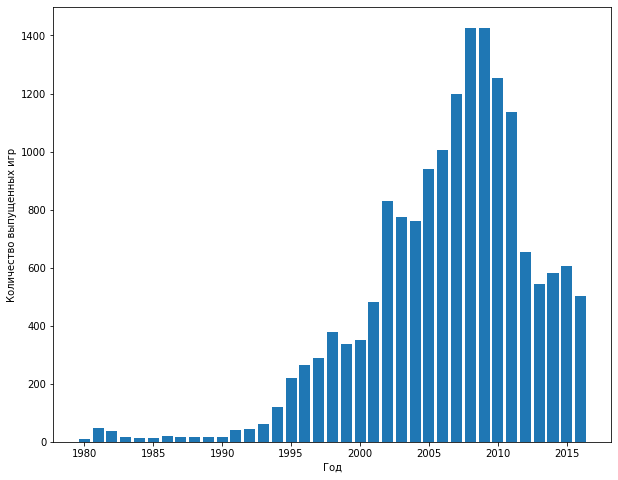

In [4]:
#print(df.groupby(by='year').count()['name'])
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(x=df.groupby(by='year').count().index, height=df.groupby(by='year').count()['name'])
#ax.set_title('Количество выпущенных игр по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Количество выпущенных игр')

До 1995 года в год выпускалось менее 200 игр. Больше 1000 игр в год выпускалось с 2006 по 2011 года, с пиками в 2008 и 2009 годах.

<a id='part3.2'></a>
### 3.2 Продажи игр, выпущенных в разные годы на разных платформах

In [5]:
#fig, ax = plt.subplots(figsize=(14,8))
#for name in df.groupby(by='platform').sum()['total_sales'].sort_values(ascending=False).head(13).index:
#    ax.plot(df.query('platform == @name').groupby('year').sum().index, 
#            df.query('platform == @name').groupby('year').sum()['total_sales'])
#ax.legend(df.groupby(by='platform').sum()['total_sales'].sort_values(ascending=False).head(13).index)
#ax.set_xlabel('Год')
#ax.set_ylabel('Проданные копии, млн')

Всего платформ: 31


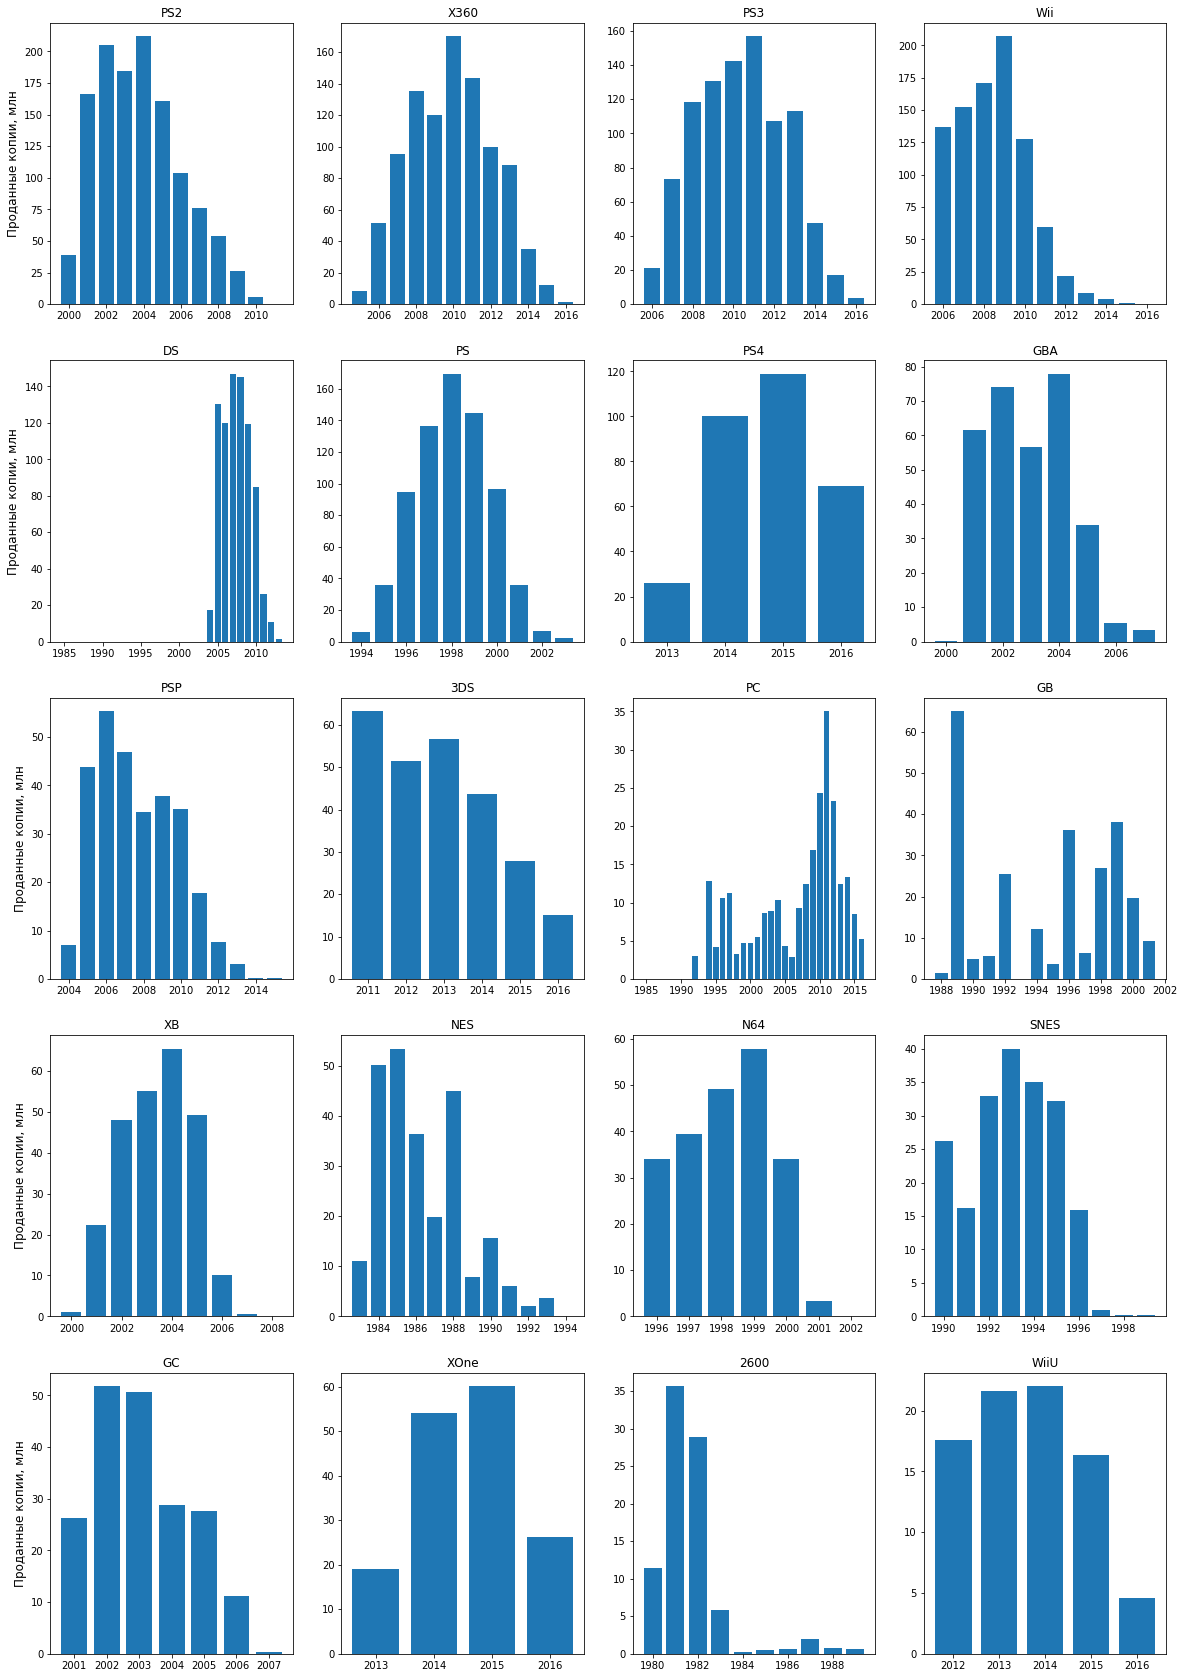

In [6]:
print('Всего платформ:',len(df['platform'].unique()))

fig, ax = plt.subplots(5,4,figsize=(20,30))
row=0
col=0
for name in df.groupby(by='platform').sum()['total_sales'].sort_values(ascending=False).head(20).index:
           
    ax[row,col].bar(x=df.query('platform == @name').groupby('year').sum().index, 
                    height=df.query('platform == @name').groupby('year').sum()['total_sales'])
    ax[row,col].set_title(name)
    ax[row,0].set_ylabel('Проданные копии, млн',fontsize='large')
    col+=1
    if col == 4:
        col=0
        row+=1


Как видно из графиков, характерный срок "жизни" игровой платформы, за исключением ПК и GB, составляет около 6 лет.

На основании этого можно сделать вывод, что для постройки прогноза на 2017 год достаточно взять данные от 2011 года. Однако, в 2013 году на смену платформам X360 и PS3 пришли платформы XOne и PS4. Эти платформы очень популярны, поэтому актуальными будут данные с 2013 года.

Согласно заданию, данные за 2016 год могут быть неполными.

In [7]:
df_years = df.groupby('platform')['year'].min().to_frame()\
.join(df.groupby('platform')['year'].max().to_frame(), lsuffix='_min', rsuffix='_max',)
#display(df.groupby('platform')['year'].max().to_frame())
#,(df.groupby('platform')['year'].max()
df_years['lifetime']=df_years['year_max']-df_years['year_min']
display(df_years)
print('Средний срок жизни платформы: {:.1f} лет'.format(df_years['lifetime'].mean()))
print('Медиана жизни платформы: {:.0f} лет'.format(df_years['lifetime'].median()))

,year_min,year_max,lifetime
platform,,,
2600,1980,1989,9
3DO,1994,1995,1
3DS,2011,2016,5
DC,1998,2008,10
DS,1985,2013,28
GB,1988,2001,13
GBA,2000,2007,7
GC,2001,2007,6
GEN,1990,1994,4


Средний срок жизни платформы: 7.6 лет
Медиана жизни платформы: 6 лет


<a id='part3.3'></a>
### 3.3 Данные за актуальный период. Платформы.

In [8]:
# выбираем данные за актуальный период
df_actual = df.query('year >= 2013')
print('Количество платформ для изучения:',len(df_actual['platform'].unique()))
print(df_actual['platform'].unique())
pivot = pd.pivot_table(df_actual, index='platform',columns='year',values='total_sales',aggfunc=sum)
pivot

Количество платформ для изучения: 11
['PS3' 'X360' 'PS4' '3DS' 'XOne' 'WiiU' 'Wii' 'PC' 'PSV' 'DS' 'PSP']


year,2013,2014,2015,2016
platform,,,,
3DS,56.57,43.76,27.78,15.14
DS,1.54,NaN,NaN,NaN
PC,12.38,13.28,8.52,5.25
PS3,113.25,47.76,16.82,3.60
PS4,25.99,100.00,118.90,69.25
PSP,3.14,0.24,0.12,NaN
PSV,10.59,11.90,6.25,4.25
Wii,8.59,3.75,1.14,0.18
WiiU,21.65,22.03,16.35,4.60


По сводной таблице видим, что к 2016 году прекратились продажи на платформах DS, PSP. Почти прекратились продажи на Wii, X360 и PS3. 

Учитывая, что данные за 2016 год неполные, выделим потенциально прибыльные платформы(т.е. платформы, игры на которых еще могут продаваться в 2017 году):

* PS4
* XOne
* 3DS
* WiiU
* PC
* PSV

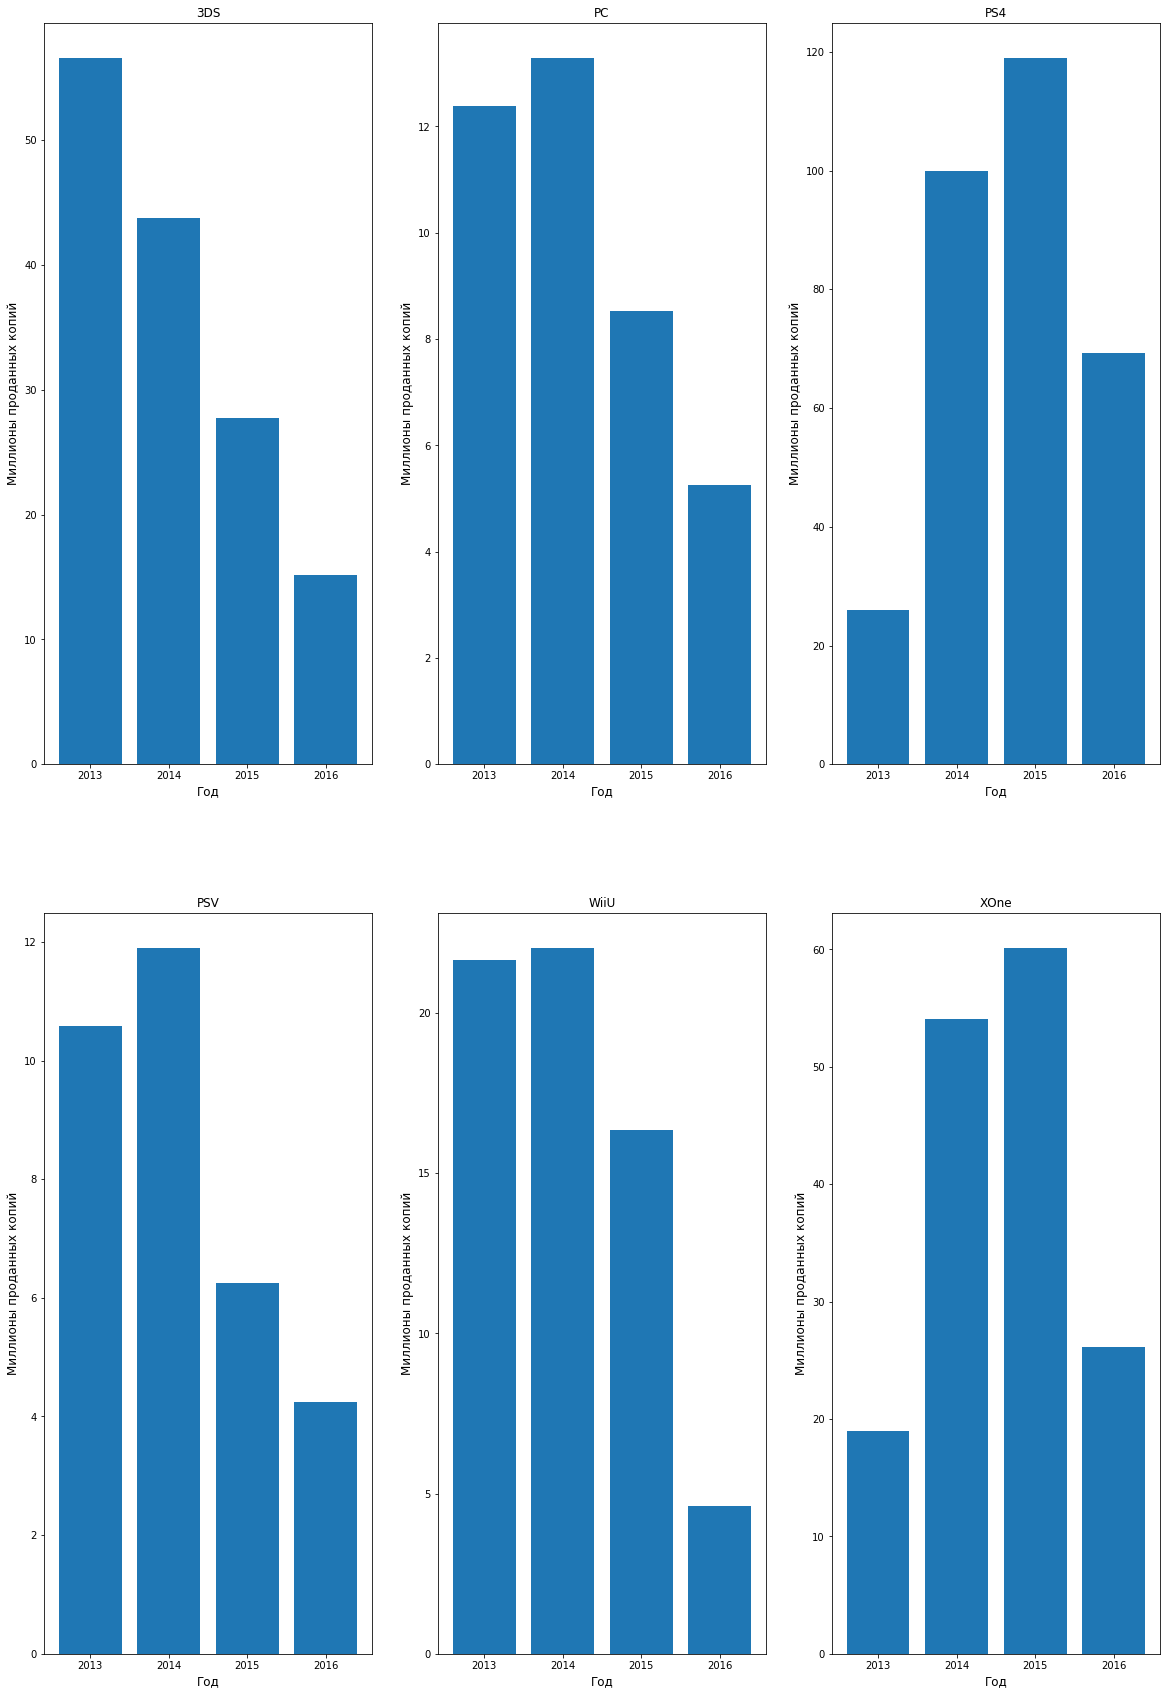

In [9]:
# Оставляем только потенциально прибыльные платформы.
platforms_good = ["3DS","PC","PS4","WiiU","XOne","PSV"]
df_actual_good = df_actual.query('platform in @platforms_good')
                            #["3DS","PC","PS4","WiiU","XOne","PSV"]')

fig, ax = plt.subplots(2,3,figsize=(20,30))
row=0
col=0
for name in df_actual_good.groupby(by='platform').count()['name'].index:
    ax[row,col].bar(x=df_actual_good.query('platform == @name').groupby(by='year').sum().index, 
               height=df_actual_good.query('platform == @name').groupby(by='year').sum()['total_sales'])
    ax[row,col].set_title(name)
    ax[row,col].set_xticks([2013,2014,2015,2016])
    ax[row,col].set_ylabel('Миллионы проданных копий', fontsize='large')
    ax[row,col].set_xlabel('Год', fontsize='large')
    col+=1
    if col == 3:
        col=0
        row+=1

На всех платформах кроме XOne и PS4 с 2011 года наблюдается спад продаж.

<a id='part3.4'></a>
### 3.4 Глобальные продажи игр в разбивке по платформам

In [10]:
for name in df_actual.groupby(by='platform').count()['name'].index:
    print('\n',name)
    print(df_actual.query('platform == @name')['total_sales'].describe())


 3DS
count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: total_sales, dtype: float64

 DS
count    8.000000
mean     0.192500
std      0.172026
min      0.030000
25%      0.067500
50%      0.150000
75%      0.252500
max      0.510000
Name: total_sales, dtype: float64

 PC
count    189.000000
mean       0.208624
std        0.352304
min        0.010000
25%        0.030000
50%        0.080000
75%        0.230000
max        3.050000
Name: total_sales, dtype: float64

 PS3
count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: total_sales, dtype: float64

 PS4
count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

 PSP
count    67.

Text(0.5, 0.98, 'Диаграммы размаха глобальных продаж игр по платформам')

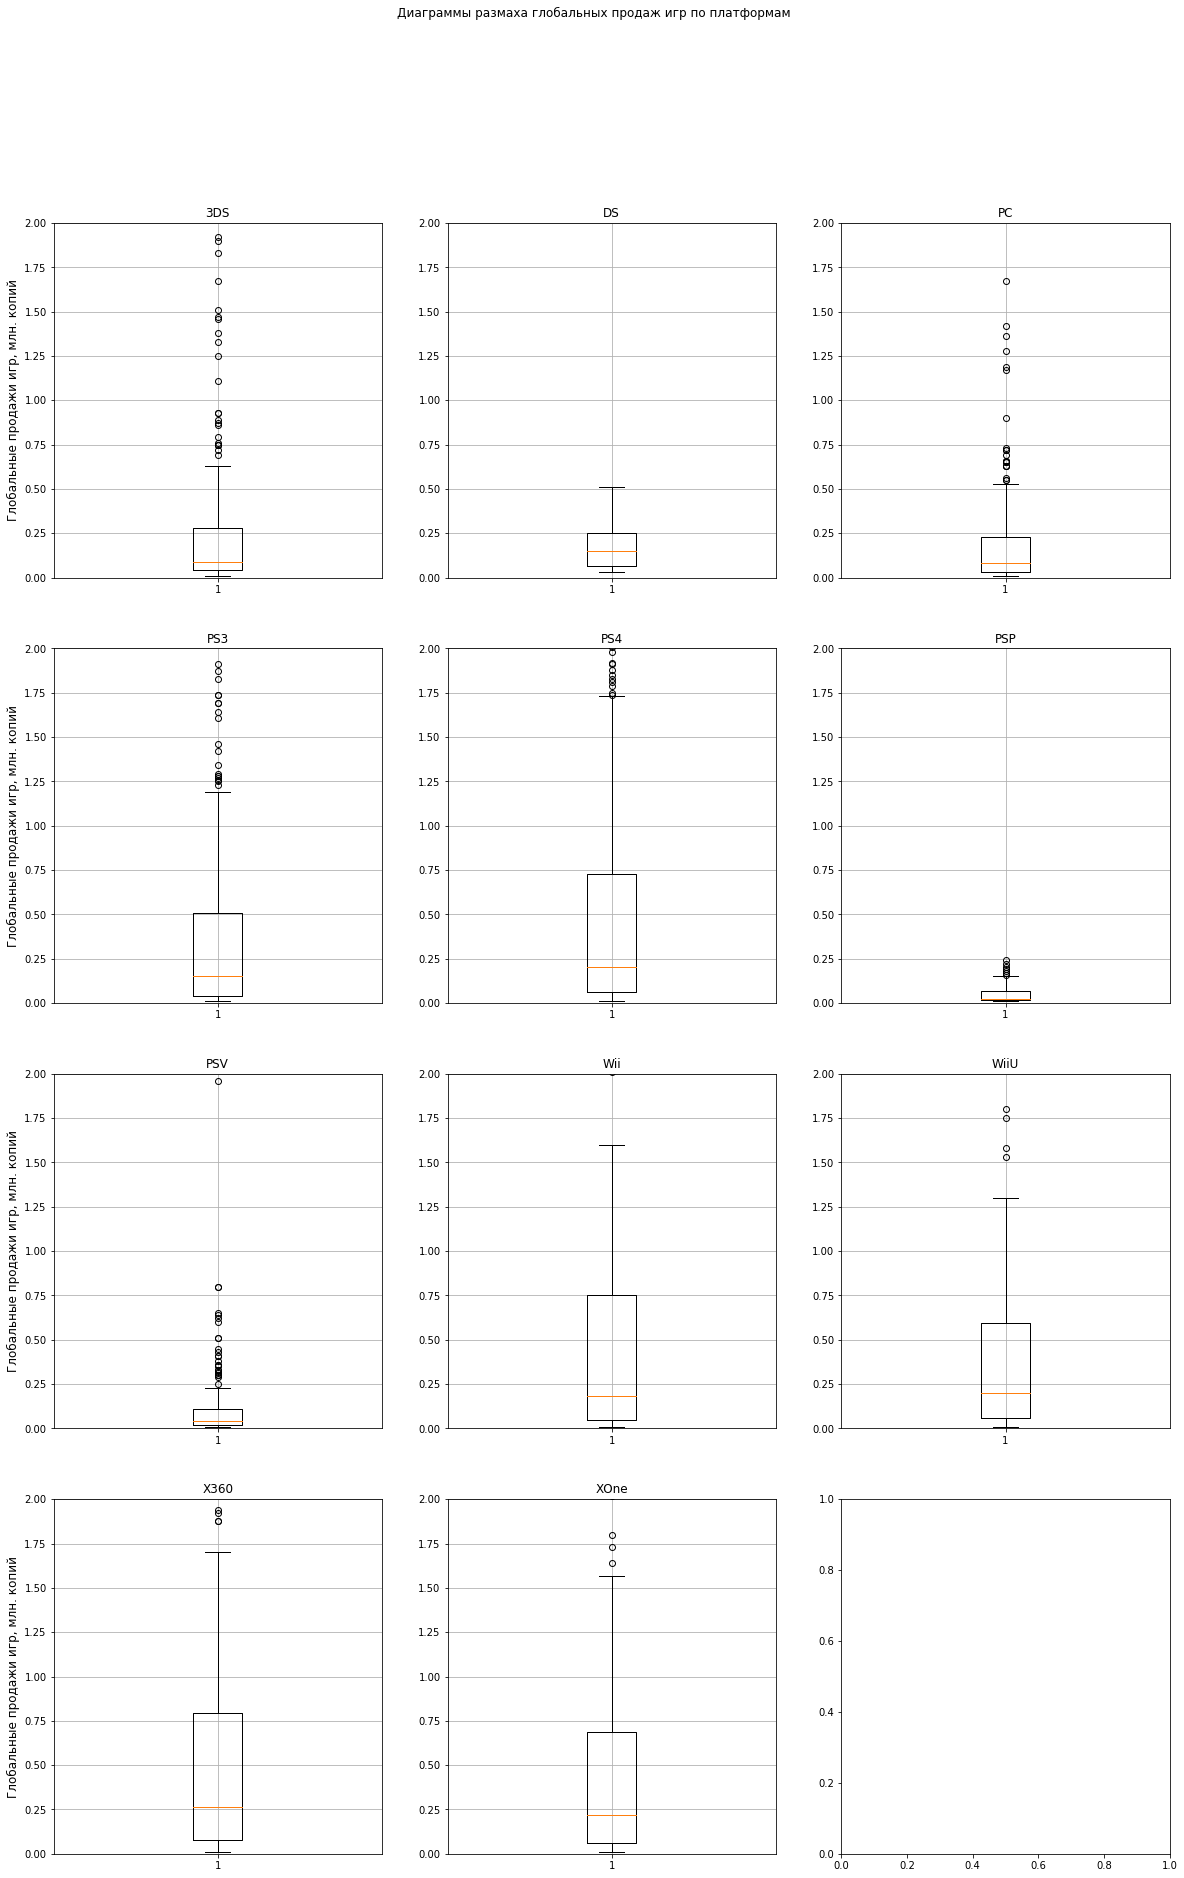

In [11]:
# строим ящики с усами глобальных продаж игр по платформам
fig, ax = plt.subplots(4,3,figsize=(20,30))
row=0
col=0
for name in df_actual.groupby(by='platform').count()['name'].index:
    ax[row,col].boxplot(x=df_actual.query('platform == @name')['total_sales']) 
    ax[row,col].set_title(name)
    ax[row,col].set_ylim(0,2)
    ax[row,col].grid()
    ax[row,0].set_ylabel('Глобальные продажи игр, млн. копий', fontsize='large')
    col+=1
    if col == 3:
        col=0
        row+=1
plt.suptitle('Диаграммы размаха глобальных продаж игр по платформам')

Во всех диаграммах присутствуют выбросы, что означает, что на каждой платформе выпускались игры, проданные большим, чем обычно количеством копий. Однако на фоне общего количества выпущенных игр таких игр мало.

PSP, PSV, PS2 имеют самую низкую медиану и самый низкий квантиль 75% глобальных продаж игр среди всех платформ.

Лучше всего продаются игры на X360, XOne, PS4, PS3. Квантиль 75% находится в районе 750000 проданных копий.

<a id='part3.5'></a>
### 3.5 Корреляция между отзывами и продажами


Text(0.5, 0.98, 'Диаграммы рассеяния для 6 платформ с максимальным кол-вом продаж с 2011 года')

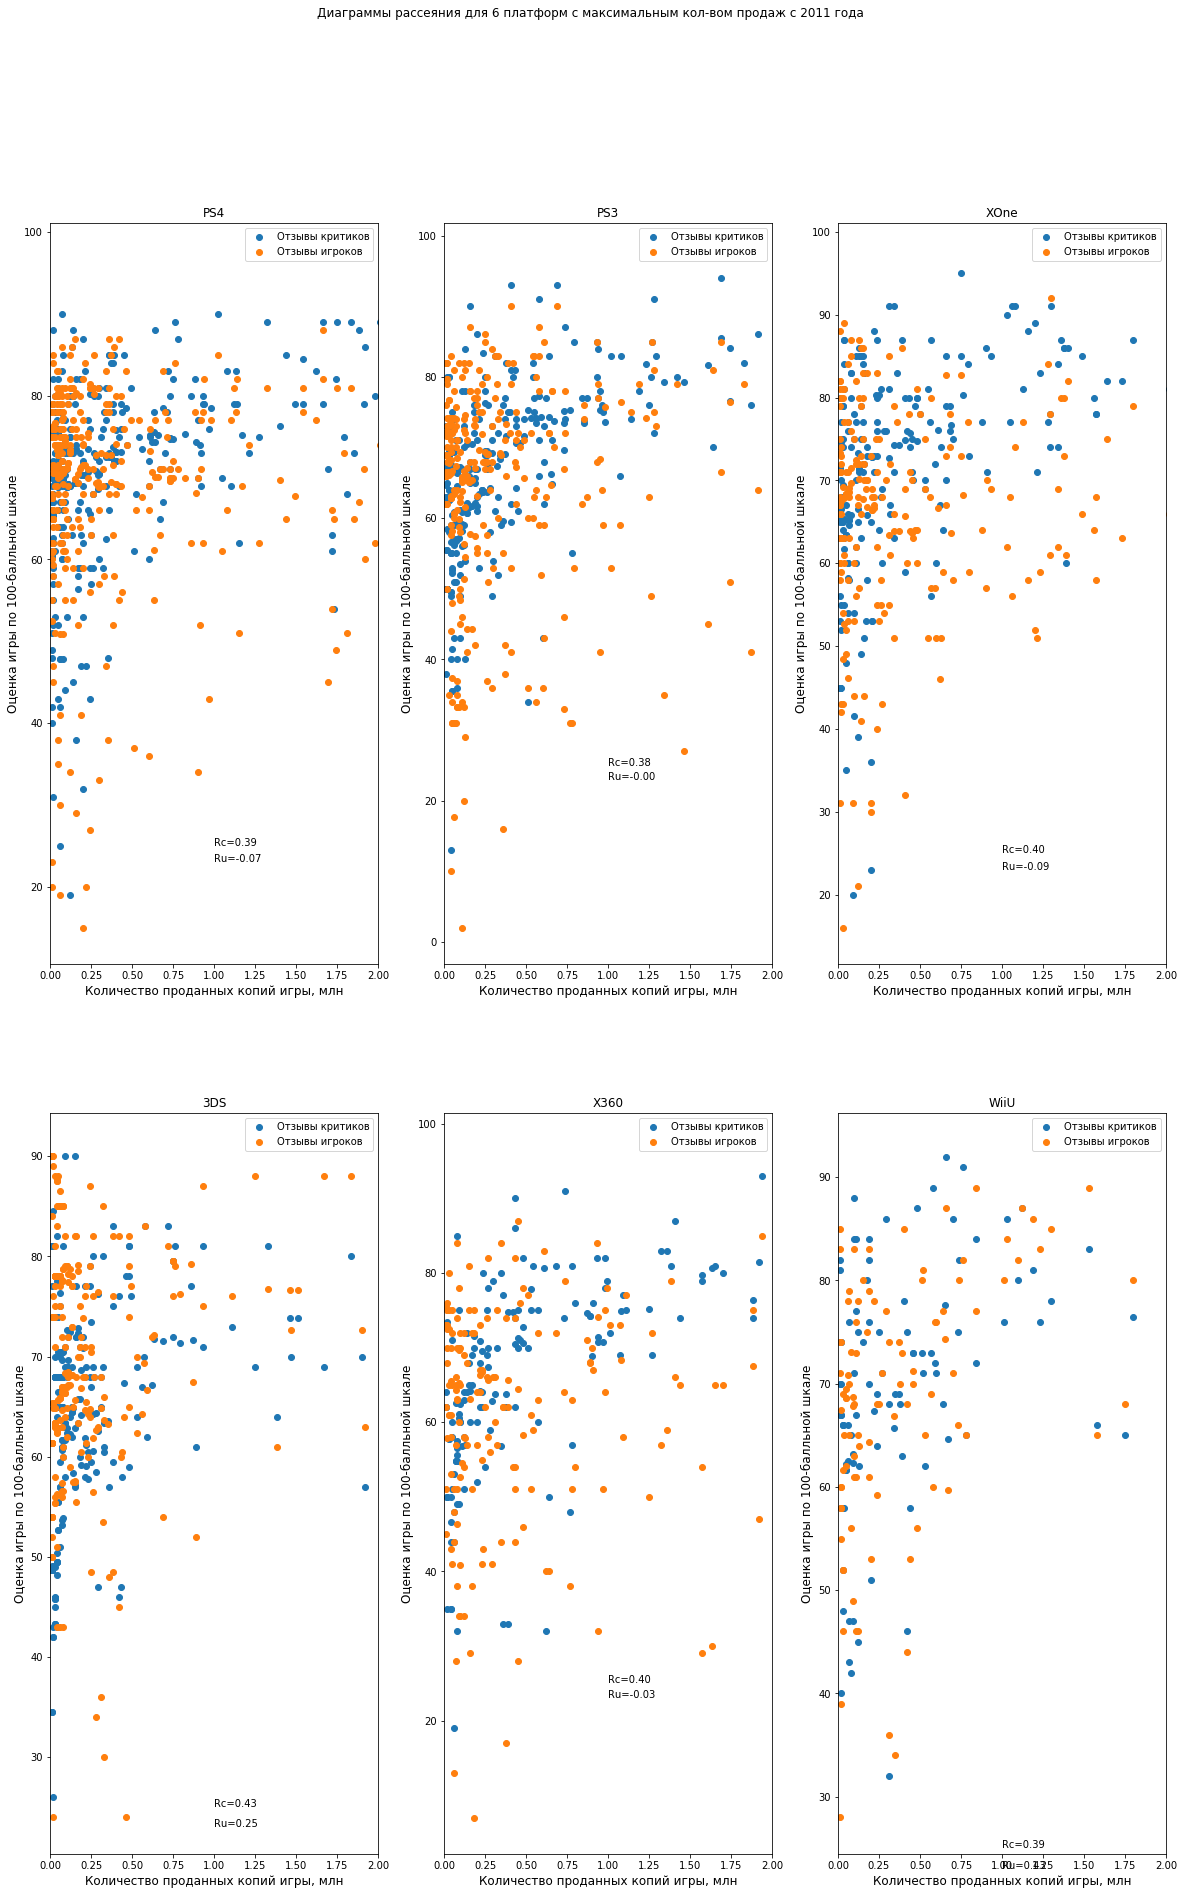

In [12]:
fig, ax = plt.subplots(2,3,figsize=(20,30))
row=0
col=0
#print(df_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6).index)
# Строим диаграммы рассеяния для 6 платформ с максимальным кол0вом продаж с 2011 года
for name in df_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6).index:
    #print(name)
    ax[row,col].scatter(x=df_actual.query('platform == @name')['total_sales'],
                        y=df_actual.query('platform == @name')['critic_score'])
    ax[row,col].scatter(x=df_actual.query('platform == @name')['total_sales'],
                        y=df_actual.query('platform == @name')['user_score'])
    ax[row,col].set_xlim(0,2)
    ax[row,col].set_title(name)
    ax[row,col].text(1, 25, 'Rc={:.2f}'.format(df_actual.query('platform == @name')['total_sales']
                     .corr(df_actual.query('platform == @name')['critic_score'])))
    ax[row,col].text(1, 23, 'Ru={:.2f}'.format(df_actual.query('platform == @name')['total_sales']
                     .corr(df_actual.query('platform == @name')['user_score'])))
    ax[row,col].legend(['Отзывы критиков','Отзывы игроков'])
    ax[row,col].set_ylabel('Оценка игры по 100-балльной шкале',fontsize='large')
    ax[row,col].set_xlabel('Количество проданных копий игры, млн',fontsize='large')
    col+=1
    if col == 3:
        col=0
        row+=1
plt.suptitle('Диаграммы рассеяния для 6 платформ с максимальным кол-вом продаж с 2011 года')

Общее количество проданных копий игры слабо коррелирует (R=0.3-0.4) с оценками критиков и не коррелирует с оценками пользователей.

<a id='part3.6'></a>
### 3.6 Распределение по жанрам.

In [13]:
for region in ['na_sales','eu_sales','jp_sales']:
    print('\nОтношение проданного количества копий к числу изданных игр по жанрам в регионе {}'.format((region[:2]).upper()))
    print((df_actual.groupby('genre')[region].sum() / df_actual.groupby('genre')[region].count()).sort_values(ascending=False))


Отношение проданного количества копий к числу изданных игр по жанрам в регионе NA
genre
Shooter         0.586845
Sports          0.305000
Platform        0.245135
Fighting        0.194375
Misc            0.177355
Action          0.164556
Role-Playing    0.158904
Racing          0.152471
Simulation      0.078387
Strategy        0.058571
Puzzle          0.048824
Adventure       0.029143
Name: na_sales, dtype: float64

Отношение проданного количества копий к числу изданных игр по жанрам в регионе EU
genre
Shooter         0.469840
Sports          0.282804
Racing          0.237529
Platform        0.210541
Simulation      0.176129
Action          0.154217
Misc            0.129290
Role-Playing    0.126610
Fighting        0.106875
Strategy        0.075357
Puzzle          0.058824
Adventure       0.033673
Name: eu_sales, dtype: float64

Отношение проданного количества копий к числу изданных игр по жанрам в регионе JP
genre
Role-Playing    0.174795
Fighting        0.095625
Simulation      0.072

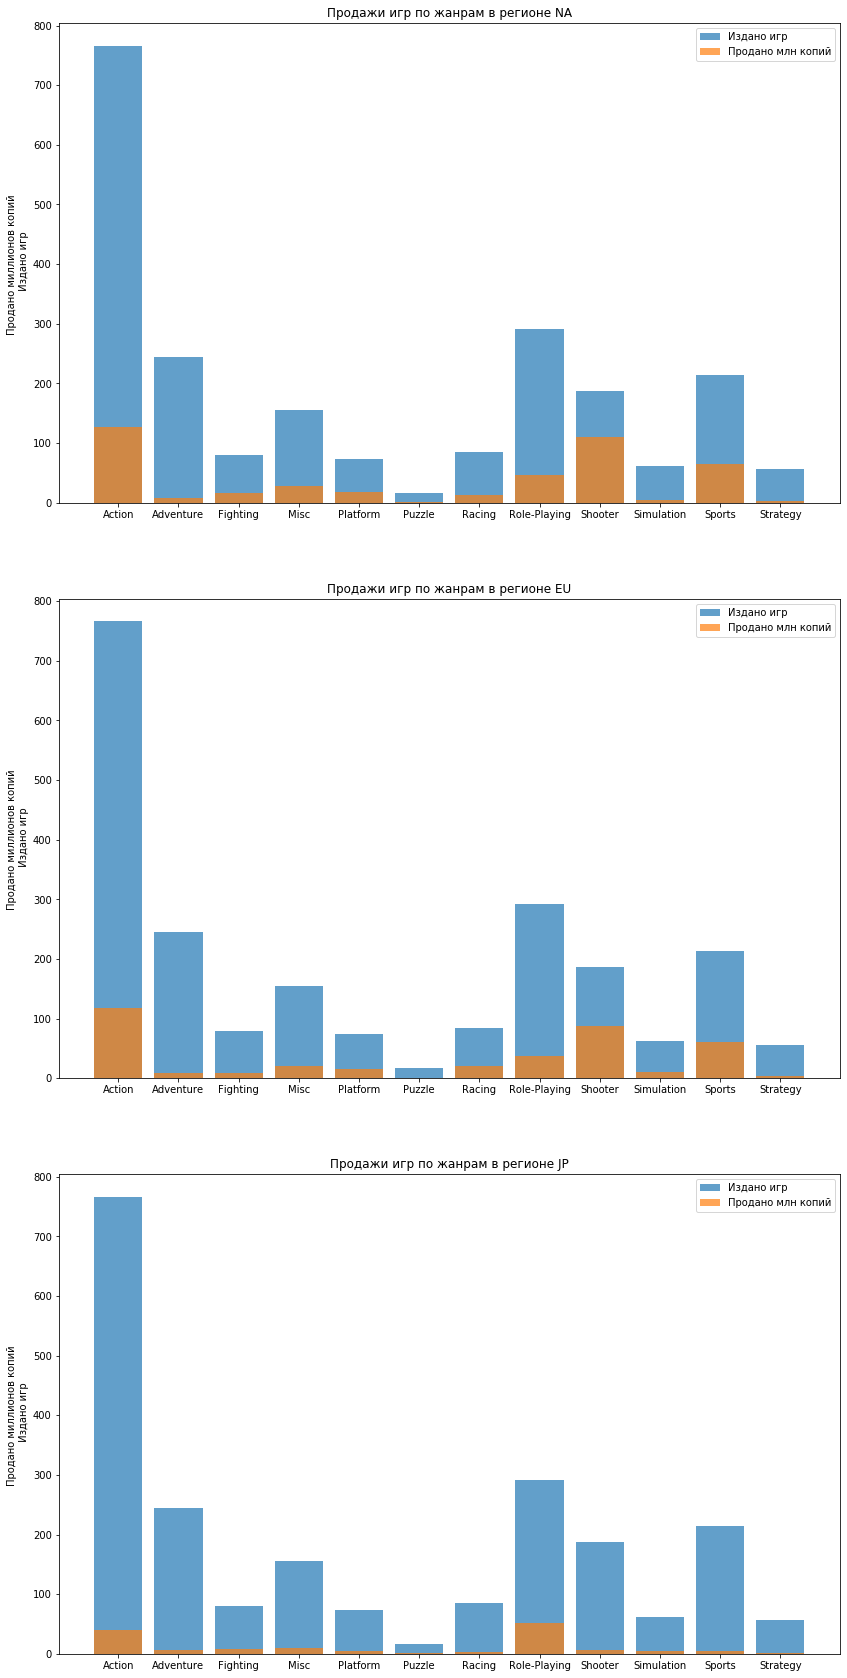

In [14]:
fig, ax = plt.subplots(3,1, figsize=(14,30))
n=0
for region in ['na_sales','eu_sales','jp_sales']:
    ax[n].bar(x=df_actual.groupby('genre')[region].count().index,
        height=df_actual.groupby('genre')[region].count(), alpha=0.7)

    ax[n].bar(x=df_actual.groupby('genre')[region].sum().index,
        height=df_actual.groupby('genre')[region].sum(),alpha=0.7)
    ax[n].set_ylabel('Продано миллионов копий \n Издано игр')
    ax[n].legend(['Издано игр', 'Продано млн копий'])
    ax[n].set_title('Продажи игр по жанрам в регионе {}'.format((region[:2]).upper()))
    n+=1

C 2013 года больше всего издано(>700) и продано(>300 млн) игр жанра Action.

Меньше всего издано и продано игр жанра Puzzle.

С 2013 года игр жанра Action и Shooter суммарно было продано больше, чем игр всех остальных жанров вместе взятых.

Если же поделить количество проданных копий на количество игр, то оказывается, что в Европе и Северной Америке самый успешный (больше всего проданных копий на одну игру) жанр Shooter, а в Японии - RPG.


<a id='part4.1'></a>
## Часть 4. Портрет пользователя каждого региона
### 4.1 Топ-5 популярных жанров и платформ для каждого региона 

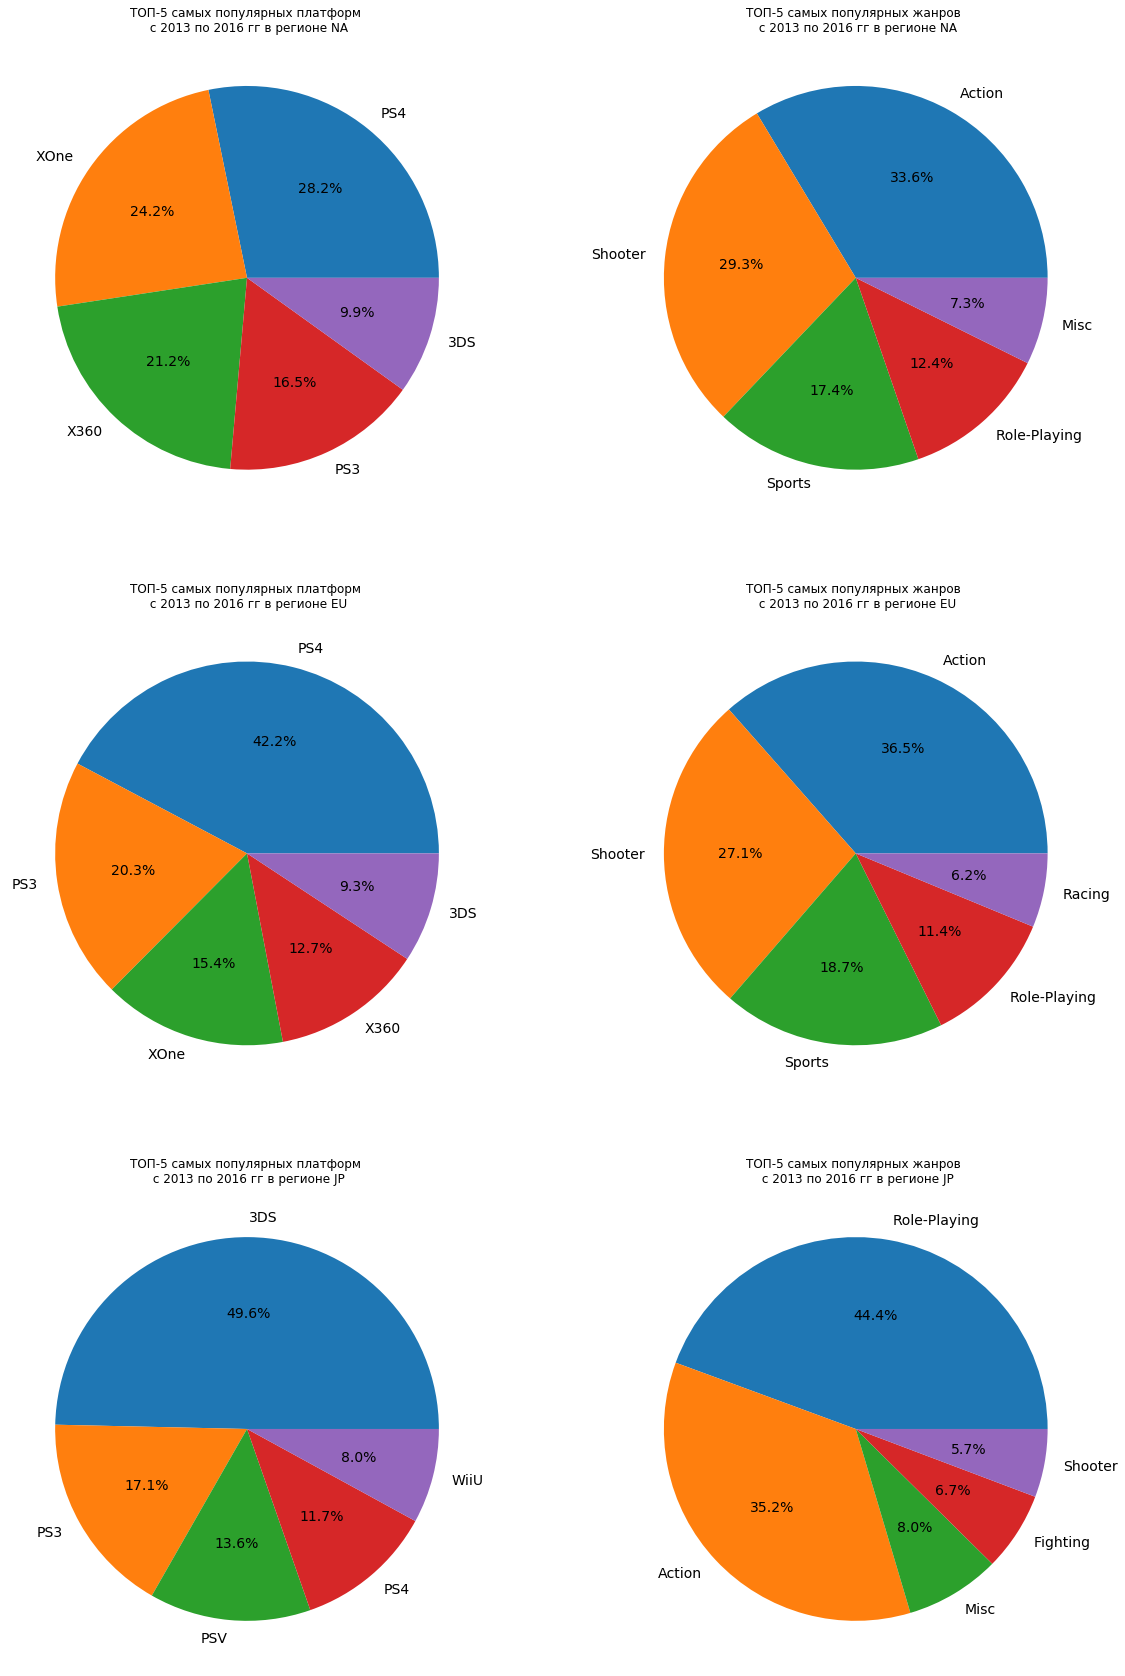

In [15]:
# Рисуем pie диаграммы топ-5 жаноров и платформ по регионам 
fig,ax = plt.subplots(3,2,figsize=(20,30))
row=0
for region in ['na_sales','eu_sales','jp_sales']:
    col=0
    ax[row,col].pie(df_actual.groupby('platform')[region].sum().sort_values(ascending=False).head(5),
                    labels=df_actual.groupby('platform')[region].sum().sort_values(ascending=False).head(5).index,
                   autopct='%.1f%%',  textprops={'size':14})
    ax[row,col+1].pie(df_actual.groupby('genre')[region].sum().sort_values(ascending=False).head(5),
                    labels=df_actual.groupby('genre')[region].sum().sort_values(ascending=False).head(5).index,
                   autopct='%.1f%%', textprops={'size':14})
    ax[row,col].set_title('ТОП-5 самых популярных платформ \n с 2013 по 2016 гг в регионе {}'.format((region[:2]).upper()))
    ax[row,col+1].set_title('ТОП-5 самых популярных жанров \n с 2013 по 2016 гг в регионе {}'.format((region[:2]).upper()))
    row+=1
    


<a id='part4.2'></a>
### 4.2 Зависимость продаж от рейтинга ESRB

Text(0.5, 1.0, 'Продажи в зависимости от рейтинга ESRB по регионам')

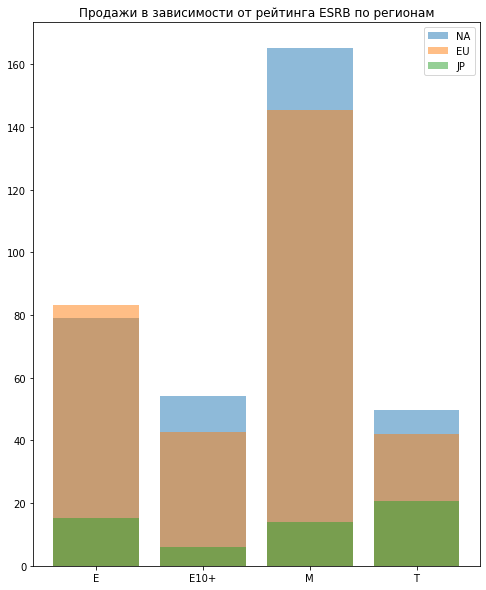

In [16]:
fig1, ax1 = plt.subplots(figsize=(8,10))
# Влияние рейтинга ESRB
for region in ['na_sales','eu_sales','jp_sales']:
    ax1.bar(x = df_actual.groupby('esrb')[region].sum().index, height = df_actual.groupby('esrb')[region].sum(),alpha=0.5)
ax1.legend(['NA','EU','JP'])
ax1.set_title('Продажи в зависимости от рейтинга ESRB по регионам')

## Вывод
##### Самые популярные платформы:
* Северная Америка - PS4 (28.2% продаж)
* Европа - PS4 (42.2% продаж)
* Япония - 3DS (49.6% продаж)

Игровые платформы в Северной Америке распространены более равномерно, тогда как в Европе и Японии одна из платформ явно выделяется (PS4 и 3DS).

##### Самые популярные жанры:
* Северная Америка - Action (33.6% продаж)
* Европа - Action (36.5% продаж)
* Япония - RPG (44.4% продаж)

##### Зависимость от рейтинга ESRB:

В Северной Америке и Европе самый продаваемый рейтинг Mature, причем игр этого рейтинга продается в разы больше, чем игр других рейтингов.

В Японии продажи игр по рейтингам распределены более равномерно, явно выделяющихся нет, что логично, т.к. ESRB - Американский рейтинг.


<a id='part5.1'></a>
## Часть 5. Проверка гипотез.
### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Для проверки равенства средних значений двух выборок сформулируем гипотезы:

H<sub>0</sub>: Средние пользовательские рейтинги платформ Xbox One и PC равны.

H<sub>1</sub>: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

Проверим гипотезу с помощью t-критерия.

Для проверки с помощью критерия Стьюдента необходимо убедиться, что исследуемые независимык выборки распределены нормально и их дисперсии равны.  

Для проверки распределения воспользуемся тестом Шапиро-Уилка.
Нулевая гипотеза теста Шапиро–Уилка заключается в том, что выборка распределена по нормальному закону. 
Альтернативная гипотеза заключается в том, что закон распределения не является нормальным.

Равенство дисперсий проверим критерием Бартлетта.


In [17]:
from scipy import stats as st
from scipy import ndimage as nd
import statistics 

print('P-value теста Шапиро-Уилка для рейтингов платформы XBox:',
      st.shapiro(df_actual.query('platform == "XOne"').dropna(subset=['user_score'])['user_score'])[1])
print('P-value теста Шапиро-Уилка для рейтингов платформы PC:',
      st.shapiro(df_actual.query('platform == "PC"').dropna(subset=['user_score'])['user_score'])[1])

print('P-value критерия Бартлетта о равенстве дисперсий:',
    st.bartlett(df_actual.query('platform == "PC"').dropna(subset=['user_score'])['user_score'],
       df_actual.query('platform == "XOne"').dropna(subset=['user_score'])['user_score'])[1])

#print(statistics.variance(df_actual.query('platform == "PC"').dropna(subset=['user_score'])['user_score']))
#print(statistics.variance(df_actual.query('platform == "XOne"').dropna(subset=['user_score'])['user_score']))
#print(p_value)

P-value теста Шапиро-Уилка для рейтингов платформы XBox: 7.445919436577242e-07
P-value теста Шапиро-Уилка для рейтингов платформы PC: 3.8485862319248554e-07
P-value критерия Бартлетта о равенстве дисперсий: 0.0004265012757910866


Выберем критерий значимости 0.01  
P-value каждой из выборок в -7 степени. Следовательно нулевую гипотезу опровергнуть не удается. Считаем распределения нормальными.  
P-value критерия Бартлетта также меньше критерия значимости. Считаем дисперсии равными.

Можно сравнивать среднее выборок с помощью t-критерия.

In [18]:
alpha = .05

test_result = st.ttest_ind(
    df_actual.query('platform == "XOne"').dropna(subset=['user_score'])['user_score'], 
    df_actual.query('platform == "PC"').dropna(subset=['user_score'])['user_score'])

print(test_result)
print('p-значение: ', test_result.pvalue)

if (test_result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Ttest_indResult(statistic=1.6119128157914844, pvalue=0.10772851238517651)
p-значение:  0.10772851238517651
Не получилось отвергнуть нулевую гипотезу


P-значение равно 0.1  
Гипотезу о равенстве средних пользовательских оценок игр на платформах XBox One и PC не удалось отвергнуть при уровне значимости 5%.

Cредние пользовательские рейтинги по платформам XBox One и PC различаются, но с вероятностью в 10% получить такие различия можно случайно.

<a id='part5.2'></a>
### 5.2 Средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки равенства средних значений двух выборок сформулируем гипотезы:

H<sub>0</sub>: Средние пользовательские рейтинги жанров Action и Sports равны.

H<sub>1</sub>: Средние пользовательские рейтинги жанров Action и Sports не равны.

Проверим гипотезу с помощью t-критерия.

Для проверки с помощью критерия Стьюдента необходимо убедиться, что исследуемые независимык выборки распределены нормально и их дисперсии равны.  

Для проверки распределения воспользуемся тестом Шапиро-Уилка.
Нулевая гипотеза теста Шапиро–Уилка заключается в том, что выборка распределена по нормальному закону. 
Альтернативная гипотеза заключается в том, что закон распределения не является нормальным.

Равенство дисперсий проверим критерием Бартлетта.

In [19]:
print('P-value теста Шапиро-Уилка для рейтингов жанра Action:',
      st.shapiro(df_actual.query('genre == "Action"').dropna(subset=['user_score'])['user_score'])[1])
print('P-value теста Шапиро-Уилка для рейтингов жанра Sports:',
      st.shapiro(df_actual.query('genre == "Sports"').dropna(subset=['user_score'])['user_score'])[1])

print('P-value критерия Бартлетта о равенстве дисперсий:',
    st.bartlett(df_actual.query('genre == "Action"').dropna(subset=['user_score'])['user_score'],
       df_actual.query('genre == "Sports"').dropna(subset=['user_score'])['user_score'])[1])

P-value теста Шапиро-Уилка для рейтингов жанра Action: 3.2718886791464926e-20
P-value теста Шапиро-Уилка для рейтингов жанра Sports: 0.010921532288193703
P-value критерия Бартлетта о равенстве дисперсий: 2.52117029038017e-22


Выберем критерий значимости 0.011  
P-value каждой из выборок меньше критерия значимости. Следовательно нулевую гипотезу опровергнуть не удается. Считаем распределения нормальными.  
P-value критерия Бартлетта также меньше критерия значимости. Считаем дисперсии равными.

Можно сравнивать среднее выборок с помощью t-критерия.

In [20]:
aplha = .01
test_result = st.ttest_ind(
    df_actual.query('genre == "Action"').dropna(subset=['user_score'])['user_score'], 
    df_actual.query('genre == "Sports"').dropna(subset=['user_score'])['user_score'])

print(test_result)
print('p-значение: ', test_result.pvalue)

if (test_result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Ttest_indResult(statistic=15.551311251089608, pvalue=9.37880667123777e-49)
p-значение:  9.37880667123777e-49
Отвергаем нулевую гипотезу


P-значение равно 9.37 * 10<sup>-49</sup>  
Гипотезу о равенстве средних пользовательских оценок игр жанров Action и Sports удалось отвергнуть при уровне значимости 1%.

### Вывод
Гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC равны" не удалось отвергнуть при уровне значимости 5%. Если же принять уровень значимости, равный 11%, то гипотезу получится отвергнуть. P-value = 0.108

Гипотезу "Средние пользовательские рейтинги жанров Action и Sports равны" удалось отвергнуть. P-value = 9.37*10<sup>-49</sup>

## Общий вывод
<a id='part6'></a>
Были изучены данные о продажах игр на разных платформах в разных регионах с целью выявления закономерностей успешной продажи.

* Данные предобработаны (часть 2). Удалены лишние строки, обработаны дубликаты, частично заполнены пропуски, изменен тип данных.
* Проведен исследовательский анализ с целью выявления актуального периода исследования. Актуальным периодом был выбран промежуток с 2013 по 2016 года, т.к. в 2013 году было выпущено 2 популярных платформы - PS4 и XBox One.
* Проведен исследовательский анализ с целью прослеживания корреляции между отзывами на игру и продажами. Продажи игры слабо коррелируют с оценками критиков (R=0.4) и не коррелируют с отзывами игроков. Тем не менее, по диаграммам рассеяния можно увидеть, что игр с низкой оценкой критиков и высокими продажами не существует.
* Проведен исследовательский анализ с целью выявления успешных платформ по регионам за 2013-2016 гг.
    - В Северной Америке больше всего игр продается на платформу PS4(28.2%). На втором месте XBox One с разницей в 4%.
    - В Европе больше всего игр продается на платформу PS4(42.2%).
    - В Японии практически половина продаж приходится на платформу 3DS (49.6%)
* Проведен исследовательский анализ с целью выявления самых продаваемых жанров по регионам за 2013-2016 гг.
    - В Северной Америке самый продаваемый жанр Action
    - В Европе самый продаваемый жанр Action
    - В Японии самый продаваемый жанр RPG
* Проведен исследовательский анализ с целью выявления самых успешных жанров по регионам за 2013-2016 гг. Критерий успешности жанра - наибольшее среднее количество проданных копий на одну изданную игру.
    - В Северной Америке и Европе самый успешный жанр Shooter
    - В Японии самый продаваемый жанр RPG
* Проверены статистические гипотезы
    - Гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC равны" не удалось отвергнуть
    - Гипотезу "Средние пользовательские рейтинги жанров Action и Sports равны" удалось отвергнуть

В 2017 году в Северной Америке и Европе успешнее всего будут продаваться игры жанров Shooter и Action на платформе PS4
В Японии - RPG на платформе 3DS.
Если у игры оценка критиков будет выше среднего, то игра будет продаваться лучше.